In [27]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import pyranges as pr
import itertools
import functions as fn
from collections import defaultdict
import os




In [28]:
species = "Nmel"
base_dir = "/Genomics/kocherlab/bjarnold/STARRseq/data/meme_suite/sea_output"
wd = f"{base_dir}/{species}"
eval_thresh = 0.1

# these files should have all reported TFBSs with E-value <= 10

raw_sea_df = pd.read_csv(f'{wd}/raw/sea.tsv', sep="\t")
dedup_sea_df = pd.read_csv(f'{wd}/dedup/sea.tsv', sep="\t")

columns = ["RANK","ID","ENR_RATIO", "EVALUE"]
raw_sea_df = raw_sea_df[columns]
dedup_sea_df = dedup_sea_df[columns]

raw_sea_df = raw_sea_df[raw_sea_df['EVALUE'] <= eval_thresh].reset_index(drop=True)
dedup_sea_df = dedup_sea_df[dedup_sea_df['EVALUE'] <= eval_thresh].reset_index(drop=True)

# remove rows for which ID is NaN
raw_sea_df = raw_sea_df[raw_sea_df["ID"].notna()]
dedup_sea_df = dedup_sea_df[dedup_sea_df["ID"].notna()]

raw_sea_df

,RANK,ID,ENR_RATIO,EVALUE
0,1,Kr_SOLEXA_2.5,2.66,6.240000e-20
1,2,pad_SOLEXA_5,1.28,3.670000e-07
2,3,lola_PC_SOLEXA_5,1.10,1.260000e-06
3,4,CG12236_PB_SOLEXA_2.5,1.13,1.500000e-04
4,5,Antp_SOLEXA,1.15,2.870000e-04
5,6,sage_da_SOLEXA_5,1.15,5.110000e-04
6,7,ac_da_SOLEXA_5,1.12,1.150000e-03
7,8,esg_F3_5_SOLEXA,1.35,2.280000e-03
8,9,Awh_SOLEXA,1.18,9.060000e-03
9,10,ttk_PA_SOLEXA_5,1.12,9.450000e-03


In [29]:
raw_TFBS = set(raw_sea_df["ID"].unique())
dedup_TFBS = set(dedup_sea_df["ID"].unique())

print(f"Number of TFBSs in raw SEA output: {len(raw_TFBS)}")
print(f"Number of TFBSs in deduplicated SEA output: {len(dedup_TFBS)}")

# get the number of TFBSs that are in both raw and deduplicated SEA output
common_TFBS = raw_TFBS.intersection(dedup_TFBS)
print(f"Number of TFBSs in both raw and deduplicated SEA output: {len(common_TFBS)}")

Number of TFBSs in raw SEA output: 17
Number of TFBSs in deduplicated SEA output: 22
Number of TFBSs in both raw and deduplicated SEA output: 9


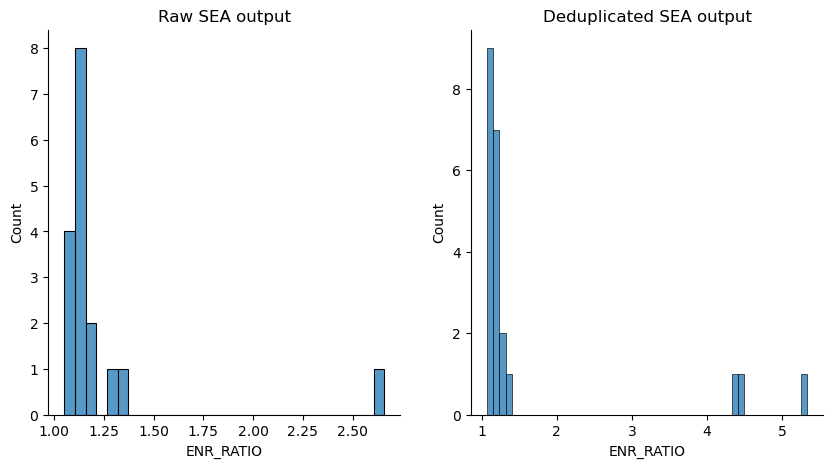

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(data=raw_sea_df, x="ENR_RATIO", ax=axs[0])
axs[0].set_title("Raw SEA output")
sns.histplot(data=dedup_sea_df, x="ENR_RATIO", ax=axs[1])
axs[1].set_title("Deduplicated SEA output")
sns.despine()

In [35]:
b1 = 36/13
b2 = 30/11
b3 = 24/10

print(b1, b2, b3)
print((36+30+24)/(13+11+10))
print((b1+b2+b3)/3)

2.769230769230769 2.727272727272727 2.4
2.6470588235294117
2.6321678321678323
